# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient simulated in Pulse with no sepsis, with their sepsis counterpart. 

In [1]:
import pandas as pd
icustayid = 80943.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation_sepsis = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final_1613266560.csv")
simulation_sepsis = simulation_sepsis.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation_sepsis.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,112.36323268715603,5458.842365828579,0.31984931512988174,37.010964882205315,60.40670065951788,34.42346562939583,78.9473684210526,0.20899999999999985,90.95833560137486,0.975255460599332,15.625000000000016,0.0,118.72043195125875,7.325144e+09
1,75.6933346693744,5836.243542610597,35.19029923645667,37.257292346943586,56.77322069872414,34.57829782821428,71.42857142857139,0.0,91.61624911437924,0.975354587739233,16.216216216216242,10800.000000142898,123.49778319668665,7.325155e+09
2,120.91117274568907,5943.536634166894,0.34429863263169297,37.261739093424694,54.535947722621145,34.59597136194361,68.18181818181814,0.20899999999999985,90.63470509312971,0.9753636753315489,16.129032258064544,14400.000000221478,124.06126538548139,7.325158e+09
3,78.98290963895334,6488.232370642138,34.97649460431814,37.25004614805516,69.50301146766002,34.51049042936094,83.3333333333333,0.0,102.52383372439553,0.9751013225796963,16.12903225806454,18000.000000300057,133.01335915599122,7.325162e+09
4,110.68423236574127,7003.091090529425,0.426391742705196,37.24167981976677,63.678048785883014,34.53405647526024,73.17073170731703,-0.007,103.23025610937707,0.9753985667155077,16.129032258064544,21600.000000378637,139.72838885134462,7.325165e+09


In [4]:
len(simulation_sepsis)

31

In [5]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [6]:
len(simulation)

31

In [7]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,67.22873804665147,5458.739596576551,35.060957131215574,37.00801988281006,59.42292354489996,34.421668374205176,76.92307692307689,0.0,90.54828496900811,0.9760429703028267,15.625000000000016,0.0,118.86816003187538,7.325144e+09
1,121.32148142047255,5841.619544802324,32.17850753865975,37.257657197676,55.81862632344148,34.5937472486903,69.76744186046508,0.0,90.97646156064646,0.9753419635551571,16.12903225806454,10800.000000142898,123.20573800992219,7.325155e+09
2,62.43690504867337,5950.097694695659,0.34097035594293496,37.26220905395189,55.177010625964,34.609696080230016,68.18181818181814,0.0,91.78438540016778,0.9753253655263768,16.12903225806454,14400.000000221478,125.62282199613868,7.325158e+09
3,86.40698083938183,6494.997216858639,0.3280335091102005,37.25059985447217,68.4937791908635,34.49086925335671,81.08108108108104,0.03249999999999997,102.38974101398011,0.9751379363476579,16.12903225806454,18000.000000300057,133.45884068033513,7.325162e+09
4,134.9000211289189,7010.17880499755,32.99396145179078,37.24216215530623,62.8993163553934,34.53445575402129,71.42857142857139,-0.018000000000000127,103.00264053170464,0.9753540147154339,16.129032258064544,21600.000000378637,140.20516191147615,7.325165e+09


In [8]:
time = simulation_sepsis['time']
diaBP_sepsis = simulation_sepsis['DiastolicArterialPressure (mmHg)']
diaBP_no_sepsis = simulation['DiastolicArterialPressure (mmHg)']

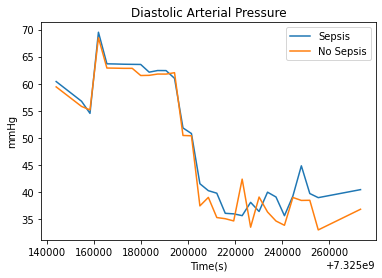

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_sepsis))
plt.plot(time, pd.to_numeric(diaBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

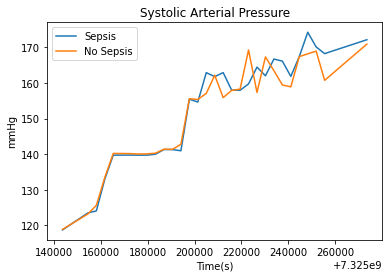

In [10]:
sysBP_sepsis = simulation_sepsis['SystolicArterialPressure (mmHg)']
sysBP_no_sepsis = simulation['SystolicArterialPressure (mmHg)']
plt.plot(time, pd.to_numeric(sysBP_sepsis))
plt.plot(time, pd.to_numeric(sysBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

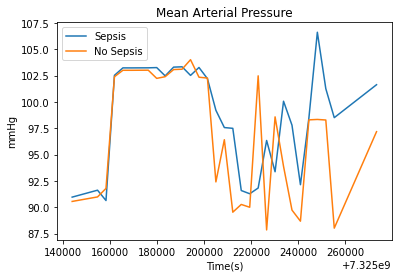

In [11]:
meanBP_sepsis = simulation_sepsis['MeanArterialPressure (mmHg)']
meanBP_no_sepsis = simulation['MeanArterialPressure (mmHg)']
plt.plot(time, pd.to_numeric(meanBP_sepsis))
plt.plot(time, pd.to_numeric(meanBP_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

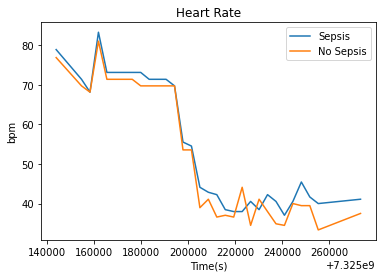

In [12]:
HR_sepsis = simulation_sepsis['HeartRate (1/min)']
HR_no_sepsis = simulation['HeartRate (1/min)']
plt.plot(time, pd.to_numeric(HR_sepsis))
plt.plot(time, pd.to_numeric(HR_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

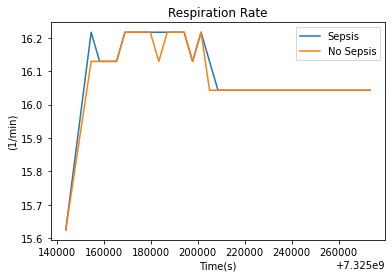

In [13]:
RR_sepsis = simulation_sepsis['RespirationRate (1/min)']
RR_no_sepsis = simulation['RespirationRate (1/min)']
plt.plot(time, pd.to_numeric(RR_sepsis))
plt.plot(time, pd.to_numeric(RR_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()

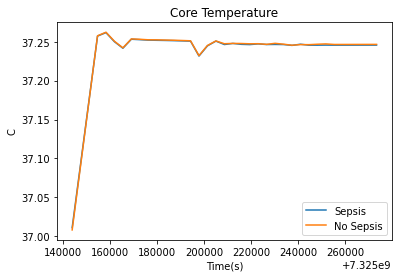

In [14]:
temp_sepsis = simulation_sepsis['CoreTemperature (degC)']
temp_no_sepsis = simulation['CoreTemperature (degC)']
plt.plot(time, pd.to_numeric(temp_sepsis))
plt.plot(time, pd.to_numeric(temp_no_sepsis))
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Sepsis', 'No Sepsis'])
plt.show()